## Decision Tree - Kyphosis  
*Source: https://www.youtube.com/watch?v=I7NrVwm3apg&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=12*
*Watch from: 53mins*

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
kyphosis = pd.read_csv('kyphosis.csv', sep= ',', header= 0)
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
print ("Dataset Length: ", len(kyphosis))

Dataset Length:  81


In [4]:
print ("Dataset Shape: ", kyphosis.shape)

Dataset Shape:  (81, 4)


In [5]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### Extracting the Dependent and Independent Variables

In [6]:
#Extract the independent variables
X = kyphosis.values[:, 1:4]
#Extract the dependent variable
y = kyphosis.values[:,0]

In [7]:
#Display X
X

array([[71, 3, 5],
       [158, 3, 14],
       [128, 4, 5],
       [2, 5, 1],
       [1, 4, 15],
       [1, 2, 16],
       [61, 2, 17],
       [37, 3, 16],
       [113, 2, 16],
       [59, 6, 12],
       [82, 5, 14],
       [148, 3, 16],
       [18, 5, 2],
       [1, 4, 12],
       [168, 3, 18],
       [1, 3, 16],
       [78, 6, 15],
       [175, 5, 13],
       [80, 5, 16],
       [27, 4, 9],
       [22, 2, 16],
       [105, 6, 5],
       [96, 3, 12],
       [131, 2, 3],
       [15, 7, 2],
       [9, 5, 13],
       [8, 3, 6],
       [100, 3, 14],
       [4, 3, 16],
       [151, 2, 16],
       [31, 3, 16],
       [125, 2, 11],
       [130, 5, 13],
       [112, 3, 16],
       [140, 5, 11],
       [93, 3, 16],
       [1, 3, 9],
       [52, 5, 6],
       [20, 6, 9],
       [91, 5, 12],
       [73, 5, 1],
       [35, 3, 13],
       [143, 9, 3],
       [61, 4, 1],
       [97, 3, 16],
       [139, 3, 10],
       [136, 4, 15],
       [131, 5, 13],
       [121, 3, 3],
       [177, 2, 14],
     

In [8]:
#Display y
y

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent'], dtype=object)

### Analyising & Visualising the Data

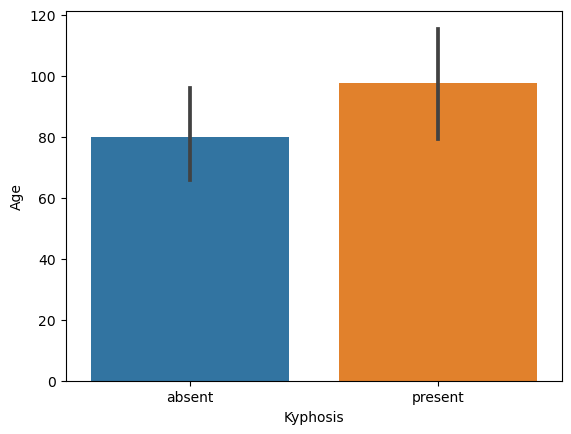

In [9]:
sns.barplot(x='Kyphosis', y='Age', data=kyphosis)
plt.show()

c:\Users\JordanFujitsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


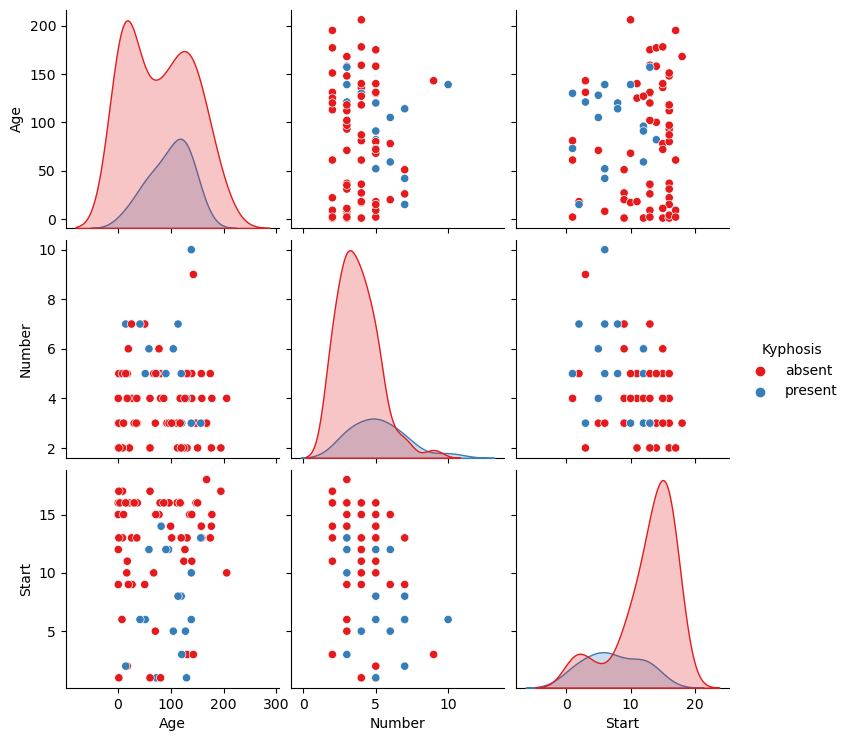

In [10]:
sns.pairplot(kyphosis, hue='Kyphosis', palette='Set1')
plt.show()

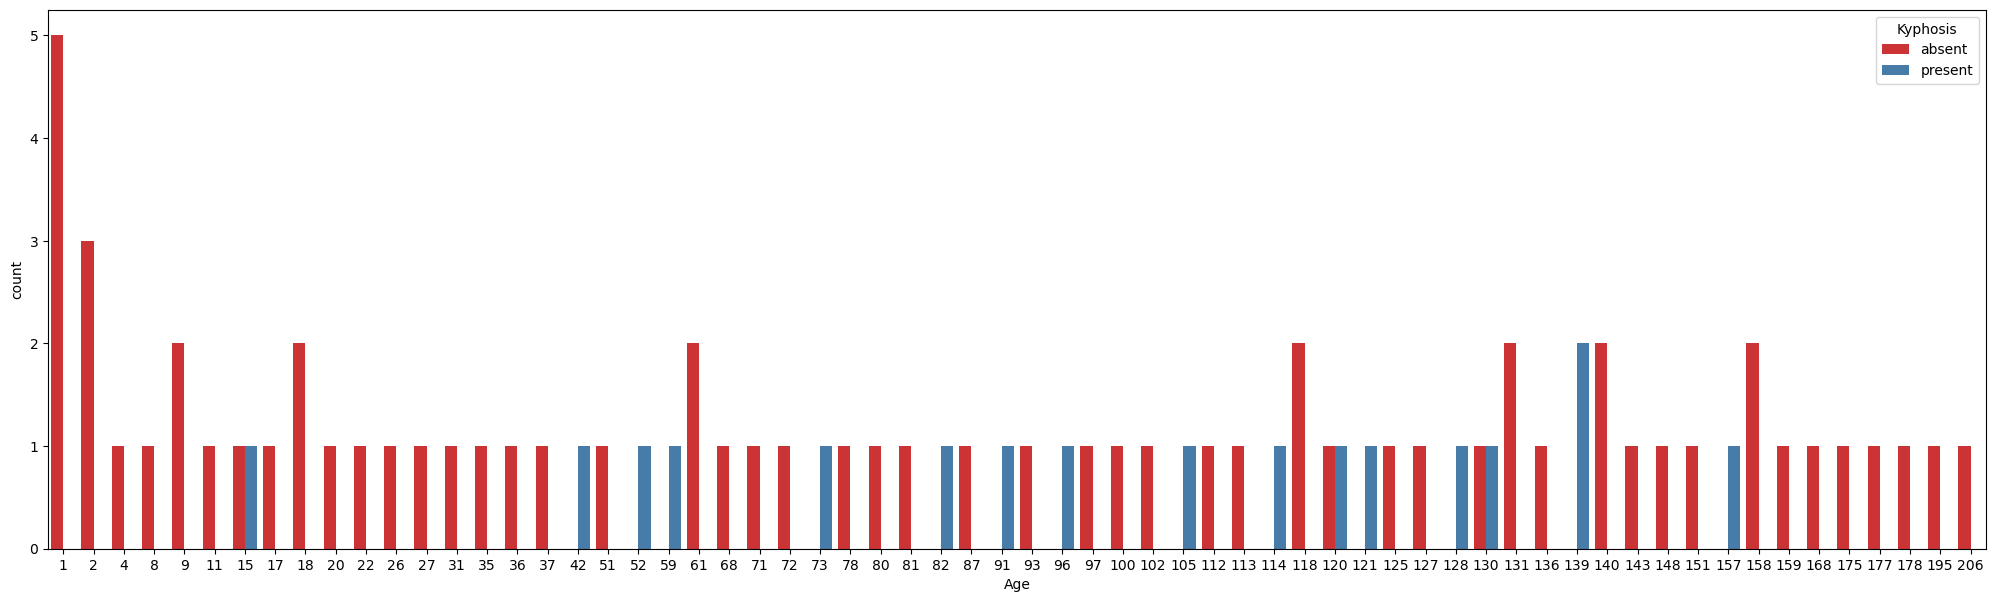

In [11]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age', hue='Kyphosis', data=kyphosis, palette='Set1')
plt.show()

### Splitting the Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)
X_train.shape


(56, 3)

In [13]:
X_test.shape

(25, 3)

### Fitting the Model to the Training Set

In [28]:
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
#tried not to overfit it
#except in the assignment we will be lol
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Testing the Prediction

In [15]:
predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

### Evaluating the Model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.77      0.81        22
     present       0.00      0.00      0.00         3

    accuracy                           0.68        25
   macro avg       0.42      0.39      0.40        25
weighted avg       0.75      0.68      0.71        25



In [18]:
#Quite low accuracy
confusion_matrix(y_test,predictions)

array([[17,  5],
       [ 3,  0]], dtype=int64)

In [29]:
print ("Accuracy is ", accuracy_score(y_test,predictions)*100)
#old 68%

Accuracy is  68.0


#### TRY THIS
**When Fitting the Model to the Training Set above, add the following code inside the DecisionTreeClassifer() brackets and run the code again - does the accuracy improve?**  

criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

### Fitting the Model to the Training Set

In [21]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Testing the Prediction

In [22]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

### Evaluating the Model

In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25



In [24]:
#Accuracy is higher
confusion_matrix(y_test,rfc_pred)

array([[19,  3],
       [ 3,  0]], dtype=int64)

In [25]:
print ("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)

Accuracy is  76.0


In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the decision tree with restrictions
dtree_restricted = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_restricted.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

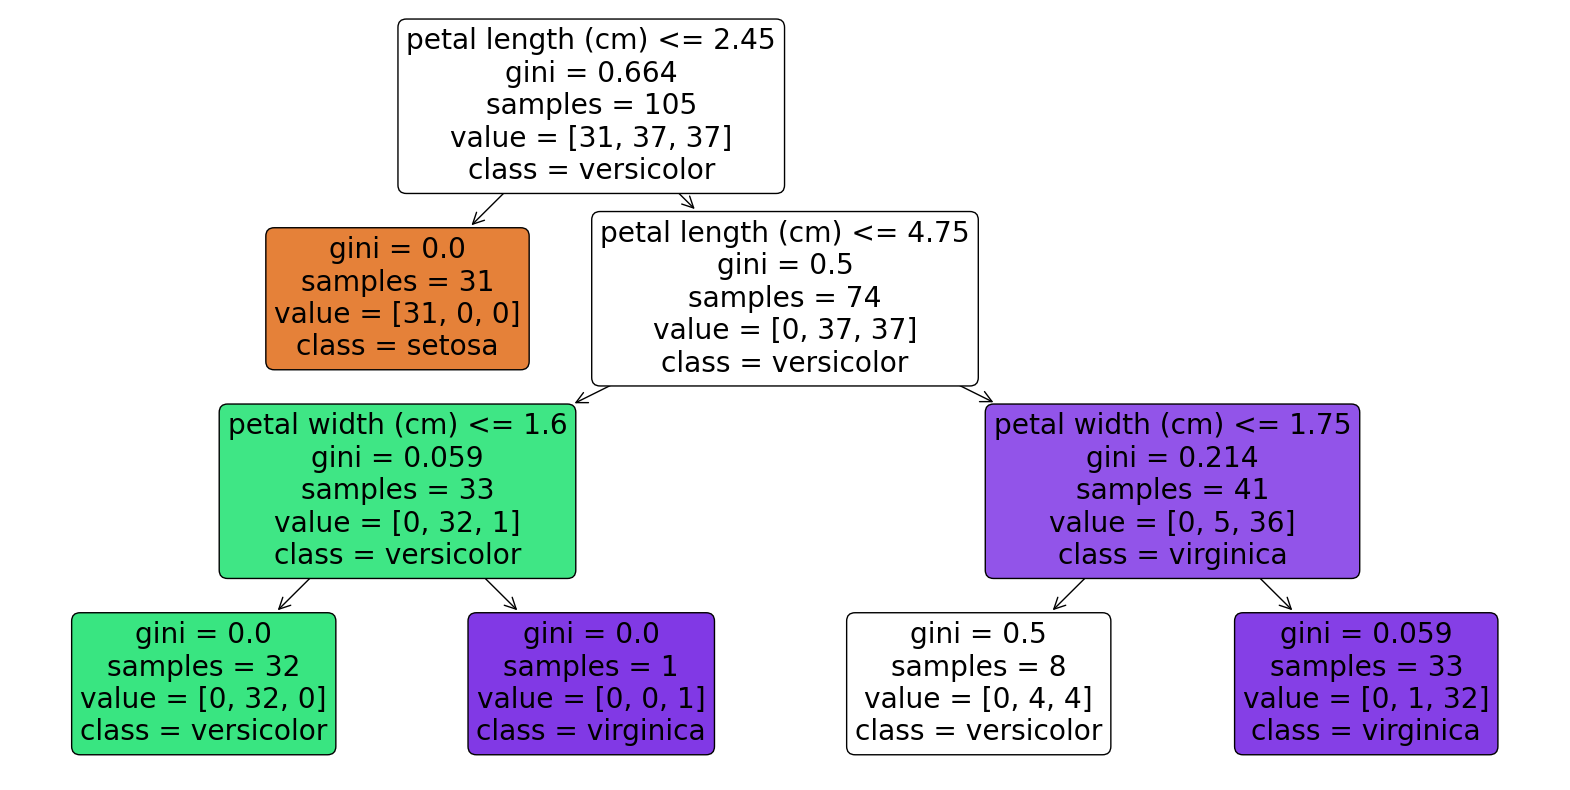

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert class_names from NumPy array to list
class_names_list = iris.target_names.tolist()

# Visualizing the trained decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree_restricted, filled=True, rounded=True, class_names=class_names_list, feature_names=iris.feature_names)
plt.show()
